In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Load the new dataset
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df['bedrooms'] = df['bedrooms'].round().astype(int)
df['bathrooms'] = df['bathrooms'].round().astype(int)
df['floors'] = df['floors'].round().astype(int)

In [17]:
# Define the target variable (house price) and features
target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

In [18]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3,2,1340,7912,2,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3,2,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,2,1340,7912,2,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [35]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3,2,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3,2,1490,8102,2,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   int64  
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   int64  
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [41]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [42]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,2,1340,7912,2,0,0,3,1340,0,1955,2005
1,5,2,3650,9050,2,0,4,5,3370,280,1921,0
2,3,2,1930,11947,1,0,0,4,1930,0,1966,0
3,3,2,2000,8030,1,0,0,4,1000,1000,1963,0
4,4,2,1940,10500,1,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,2,1510,6360,1,0,0,4,1510,0,1954,1979
4596,3,2,1460,7573,2,0,0,3,1460,0,1983,2009
4597,3,2,3010,7014,2,0,0,3,3010,0,2009,0
4598,4,2,2090,6630,1,0,0,3,1070,1020,1974,0


In [44]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [45]:
train_data = X_train.join(y_train)

In [46]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
2418,4,2,2370,10858,2,0,0,3,2370,0,2003,0,1034500.0
2149,2,2,1060,1241,2,0,0,3,960,100,2008,0,352750.0
2424,2,1,1220,17172,1,0,0,4,1220,0,1947,1988,370000.0
2125,2,1,800,5000,1,0,0,3,800,0,1906,2014,435000.0
3988,3,2,1820,12686,1,0,0,4,1820,0,1952,0,875000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,3,3,1730,1229,2,0,2,3,1320,410,2008,0,645000.0
4060,4,4,3110,108464,2,0,2,4,3110,0,1979,0,875000.0
1346,3,2,1630,8018,1,0,0,3,1630,0,2003,0,260000.0
3454,4,3,2880,4000,2,0,0,3,2100,780,1912,2000,755000.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

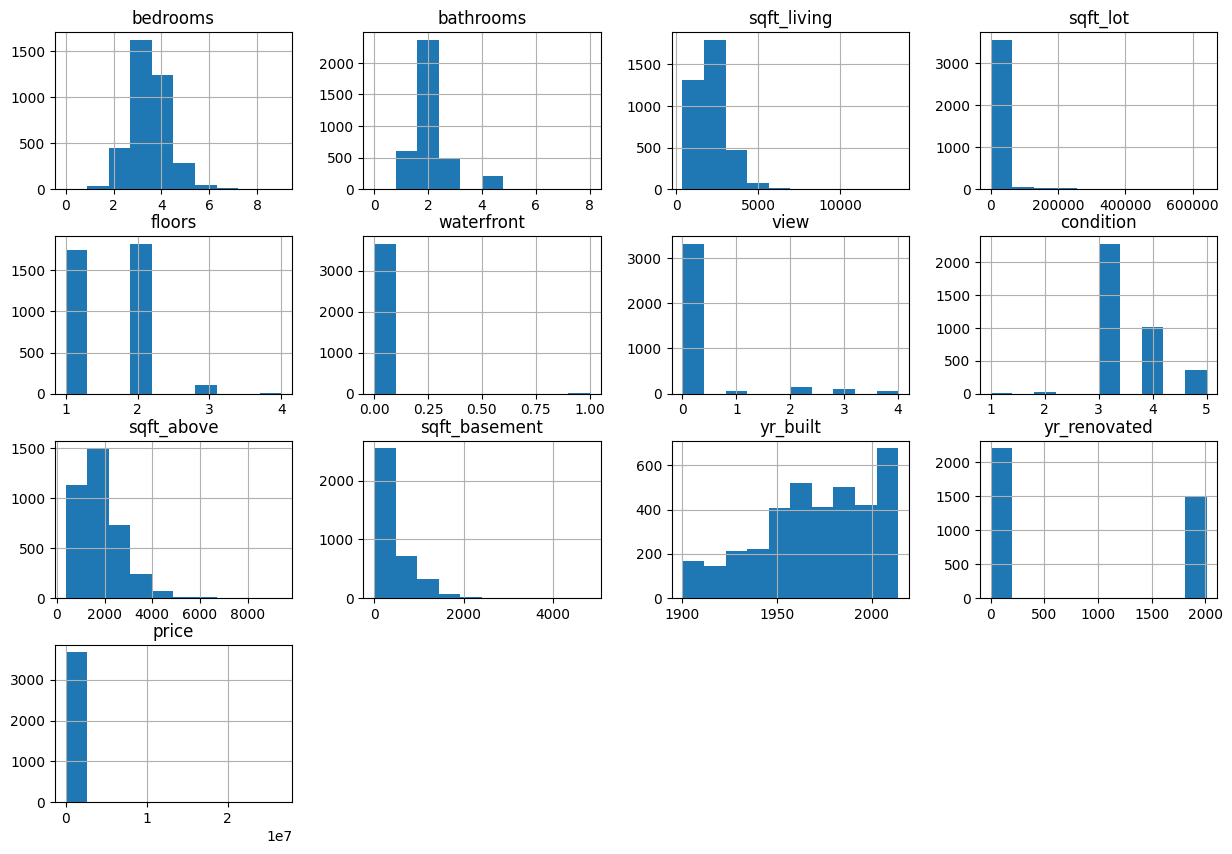

In [48]:
train_data.hist(figsize = (15, 10))

In [49]:
#correlation with each column
train_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
bedrooms,1.000000,0.507931,0.587729,0.055642,0.157929,-0.013894,0.103379,0.038758,0.470859,0.329566,0.139011,-0.052737,0.176913
bathrooms,0.507931,1.000000,0.702360,0.105105,0.298532,0.055962,0.207540,-0.047019,0.590028,0.343459,0.335322,-0.147089,0.284757
sqft_living,0.587729,0.702360,1.000000,0.224323,0.307380,0.089966,0.296941,-0.058555,0.871910,0.430302,0.295694,-0.114444,0.382873
sqft_lot,0.055642,0.105105,0.224323,1.000000,0.005223,0.018202,0.076410,-0.026782,0.235508,0.022938,0.061695,-0.013079,0.049064
floors,0.157929,0.298532,0.307380,0.005223,1.000000,0.022698,0.031042,-0.242668,0.484334,-0.266526,0.350681,-0.194956,0.130890
waterfront,-0.013894,0.055962,0.089966,0.018202,0.022698,1.000000,0.340040,-0.000140,0.051998,0.087462,-0.034461,0.016327,0.080523
view,0.103379,0.207540,0.296941,0.076410,0.031042,0.340040,1.000000,0.064533,0.156449,0.316649,-0.076808,0.030984,0.202510
condition,0.038758,-0.047019,-0.058555,-0.026782,-0.242668,-0.000140,0.064533,1.000000,-0.185857,0.223307,-0.401633,-0.192379,0.037013
sqft_above,0.470859,0.590028,0.871910,0.235508,0.484334,0.051998,0.156449,-0.185857,1.000000,-0.066830,0.415410,-0.146634,0.324330
sqft_basement,0.329566,0.343459,0.430302,0.022938,-0.266526,0.087462,0.316649,0.223307,-0.066830,1.000000,-0.163278,0.037120,0.182266


<Axes: >

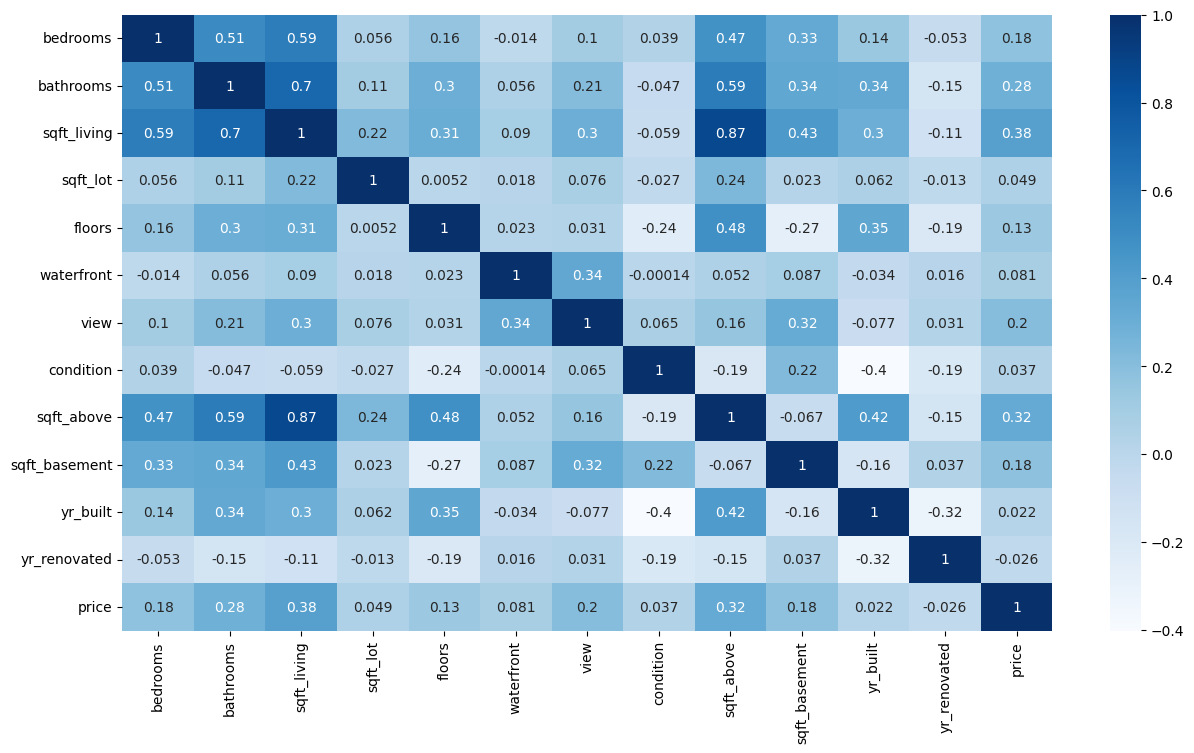

In [50]:
#heatmap on correalation and annot to see the numbers
plt.figure(figsize =  (15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap= 'Blues')

<ipython-input-79-29a5b6a9e991>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='sqft_living', y='price', data=df, palette='coolwarm')


<Axes: xlabel='sqft_living', ylabel='price'>

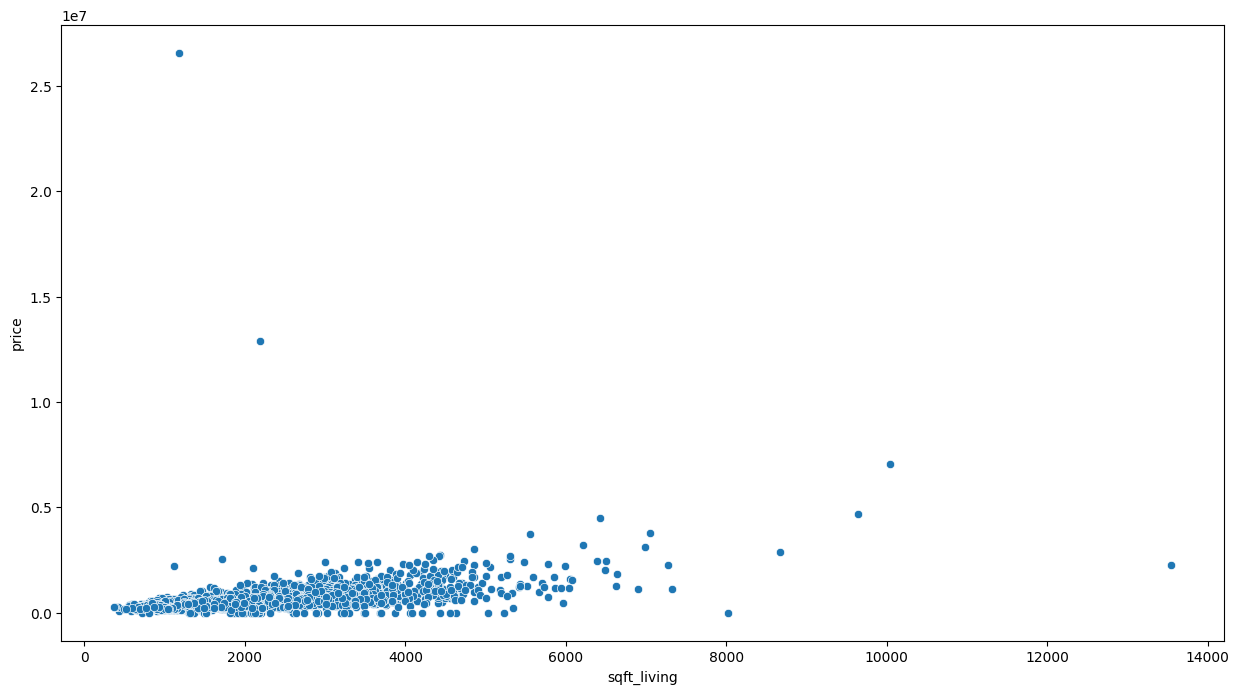

In [79]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='sqft_living', y='price', data=df, palette='coolwarm')

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [22]:
# Make predictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [71]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [72]:
print('Training MAE: ', mae_train)
print('Testing MAE: ', mae_test)
print('Training RMSE: ', rmse_train)
print('Testing RMSE: ', rmse_test)

Training MAE:  67686.03807790023
Testing MAE:  158381.4013779974
Training RMSE:  199160.3436076255
Testing RMSE:  294688.48441520944


In [73]:
# Define a function for predicting house prices
def predict_house_price(input_data):
    input_df = pd.DataFrame(input_data, columns=features)
    input_df = scaler.transform(input_df)
    predicted_price = rf.predict(input_df)
    return predicted_price[0]

In [74]:
# Example input data
input_data = {
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [2000],
    'sqft_lot': [8030],
    'floors': [1],
    'waterfront': [0],
    'view': [0],
    'condition': [4],
    'sqft_above': [1000],
    'sqft_basement': [1000],
    'yr_built': [1963],
    'yr_renovated': [0]
}

In [75]:
# Make predictions with the model
predicted_price = predict_house_price(input_data)

In [76]:
# Print the predicted price
print("Predicted house price: ", predicted_price)

Predicted house price:  420161.875
